In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow import keras

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from wordcloud import WordCloud

import numpy.linalg as lg
from numpy.linalg import norm
import seaborn as sns
import string
import os
import re

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from __future__ import absolute_import, division, print_function, unicode_literals


In [71]:
def Kmeans(x, k, iterations=3):
  indices = np.arange(X.shape[0])
  sample_indices = np.random.choice(indices, size=k, replace=False)
  means=X[sample_indices]

  for i in range(iterations):
    #this classifies based on distance
    dist = Distance(X, means)
    y_hat= np.argmin(dist, axis=1)

    #this step recalculates the means
    means = []
    for i in range(k):
      mean = np.mean(X[y_hat==i], axis=0)
      means.append(mean)
    means = np.vstack(means)
    
  dist = Distance(X, means)
  y_hat=np.argmin(dist, axis=1)

  return(y_hat, means)

In [72]:
def Responsability(X,means,beta=1e-3,*args,**kwargs):
  diff=[]
  responsibilities=[]

  for mean in means:
    diff =X -mean
    dist =(np.sum(diff ** 2,axis=1,keepdims=True))

    numerator= np.exp(-(beta*dist))
    denominator=np.sum(numerator)
    responsibility=-numerator/denominator

    responsibilities.append(responsibility)
  return np.hstack(responsibilities)

In [73]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
embedder = hub.load(module_url)

In [74]:
def TextPreProcessing(sentence):
  text = sentence.lower().strip()
  text_p = "".join(char for char in text if char not in string.punctuation)
  clean_sentence = text_dn = re.sub(r'https?:\/\/.*[\r\n]*','',text_p)
  return clean_sentence

In [75]:
def embed(sentence):
  sentence_in = [sentence]
  return embedder(sentence_in)

In [76]:
def data_load(filename):
  data = pd.read_csv(filename, header=0, encoding='iso-8859-1')
  X = data.Tweet
  return X

In [77]:
def LoadVectors(X):
  Dict_of_Sentences = dict()
  for i in range(len(X)):
    Dict_of_Sentences[i] = {'sentence': X[i], 'vector': embed(TextPreProcessing(X[i]))}
  return Dict_of_Sentences

In [78]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Enhance IT/H5: Happy Sad K means/HappySad K-Means Clustering.csv')
data

,Label,Encoding,string
0,sad,NaN,*screams in 25 different languages*
1,sad,NaN,Families to sue over Legionnaires: More than 4...
2,sad,NaN,Pandemonium In Aba As Woman Delivers Baby With...
3,sad,NaN,My emotions are a train wreck. My body is a tr...
4,happy,NaN,Alton brown just did a livestream and he burne...
...,...,...,...
1859,happy,NaN,@Trollkrattos Juan Carlos Salvador The Secret ...
1860,happy,NaN,@devon_breneman hopefully it doesn't electrocu...
1861,sad,NaN,Businesses are deluged with invokces. Make you...
1862,sad,NaN,#BREAKING411 4 police officers arrested for ab...


In [79]:
data['Encoding'] = data['Label'].apply(lambda x:1 if x == 'happy' else 0)

In [80]:
data['Encoding'].value_counts()

0    1110
1     754
Name: Encoding, dtype: int64

In [81]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [82]:
X = list(data['string'].values)
X[:5]

['*screams in 25 different languages*',
 "Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/ZA4AXFJSVB",
 'Pandemonium In Aba As Woman Delivers Baby Without Face (Photos) - http://t.co/c5u9qshhnb',
 "My emotions are a train wreck. My body is a train wreck. I'm a wreck",
 'Alton brown just did a livestream and he burned the butter and touched the hot plate too soon and made a nut joke http://t.co/gvd7fcx8iZ']

In [83]:
text_dn = [re.sub(r'https?:\/\/.*[\r\n]*','',tweets) for tweets in X]
text_dn[:5]


['*screams in 25 different languages*',
 "Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... ",
 'Pandemonium In Aba As Woman Delivers Baby Without Face (Photos) - ',
 "My emotions are a train wreck. My body is a train wreck. I'm a wreck",
 'Alton brown just did a livestream and he burned the butter and touched the hot plate too soon and made a nut joke ']

In [84]:
text_l = [item.lower() for item in text_dn]
text_l[:5]

['*screams in 25 different languages*',
 "families to sue over legionnaires: more than 40 families affected by the fatal outbreak of legionnaires' disea... ",
 'pandemonium in aba as woman delivers baby without face (photos) - ',
 "my emotions are a train wreck. my body is a train wreck. i'm a wreck",
 'alton brown just did a livestream and he burned the butter and touched the hot plate too soon and made a nut joke ']

In [85]:
text_p = []

for i in range(len(text_l)):
  tp = "".join([char for char in text_l[i].lower() if char not in string.punctuation])
  text_p.append(tp)
text_p[:5]

['screams in 25 different languages',
 'families to sue over legionnaires more than 40 families affected by the fatal outbreak of legionnaires disea ',
 'pandemonium in aba as woman delivers baby without face photos  ',
 'my emotions are a train wreck my body is a train wreck im a wreck',
 'alton brown just did a livestream and he burned the butter and touched the hot plate too soon and made a nut joke ']

In [86]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [87]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [88]:
words = []

for i in range(len(text_p)):
  w = word_tokenize(text_p[i])
  words.append(w)
print(words)


[['screams', 'in', '25', 'different', 'languages'], ['families', 'to', 'sue', 'over', 'legionnaires', 'more', 'than', '40', 'families', 'affected', 'by', 'the', 'fatal', 'outbreak', 'of', 'legionnaires', 'disea'], ['pandemonium', 'in', 'aba', 'as', 'woman', 'delivers', 'baby', 'without', 'face', 'photos'], ['my', 'emotions', 'are', 'a', 'train', 'wreck', 'my', 'body', 'is', 'a', 'train', 'wreck', 'im', 'a', 'wreck'], ['alton', 'brown', 'just', 'did', 'a', 'livestream', 'and', 'he', 'burned', 'the', 'butter', 'and', 'touched', 'the', 'hot', 'plate', 'too', 'soon', 'and', 'made', 'a', 'nut', 'joke'], ['tinyjecht', 'are', 'you', 'another', 'standuser', 'if', 'you', 'are', 'i', 'will', 'have', 'to', 'detonate', 'you', 'with', 'my', 'killer', 'queen'], ['brooke', 'just', 'face', 'timed', 'me', 'at', 'the', 'concert', 'and', 'just', 'screamed', 'for', '2', 'minutes', 'straight'], ['a', 'group', 'of', 'florida', 'forest', 'service', 'firefighters', 'could', 'be', 'deployed', 'to', 'california

In [89]:
filtered_words = []

for i in range(len(words)):
  fw = [word for word in words[i] if word not in stop_words]
  filtered_words.append(fw)
print(filtered_words)


[['screams', '25', 'different', 'languages'], ['families', 'sue', 'legionnaires', '40', 'families', 'affected', 'fatal', 'outbreak', 'legionnaires', 'disea'], ['pandemonium', 'aba', 'woman', 'delivers', 'baby', 'without', 'face', 'photos'], ['emotions', 'train', 'wreck', 'body', 'train', 'wreck', 'im', 'wreck'], ['alton', 'brown', 'livestream', 'burned', 'butter', 'touched', 'hot', 'plate', 'soon', 'made', 'nut', 'joke'], ['tinyjecht', 'another', 'standuser', 'detonate', 'killer', 'queen'], ['brooke', 'face', 'timed', 'concert', 'screamed', '2', 'minutes', 'straight'], ['group', 'florida', 'forest', 'service', 'firefighters', 'could', 'deployed', 'california', 'help', 'contain', 'fires', 'details', '10'], ['70', 'years', 'atomic', 'bombs', 'japan', 'still', 'struggles', 'war', 'past', 'anniversary', 'devastation', 'wrought', 'b'], ['majority', 'killed', 'civilians', 'ground', 'jet', 'first', 'bombed', 'citys', 'main', 'street', 'dramatically', 'plummeted'], ['idm', 'burn', 'whole', 'go

In [90]:
lemmatizer = WordNetLemmatizer()
lemmatized = []

for i in range(len(filtered_words)):
  l = [lemmatizer.lemmatize(word) for word in filtered_words[i]]
  lemmatized.append(l)
print(lemmatized)

[['scream', '25', 'different', 'language'], ['family', 'sue', 'legionnaire', '40', 'family', 'affected', 'fatal', 'outbreak', 'legionnaire', 'disea'], ['pandemonium', 'aba', 'woman', 'delivers', 'baby', 'without', 'face', 'photo'], ['emotion', 'train', 'wreck', 'body', 'train', 'wreck', 'im', 'wreck'], ['alton', 'brown', 'livestream', 'burned', 'butter', 'touched', 'hot', 'plate', 'soon', 'made', 'nut', 'joke'], ['tinyjecht', 'another', 'standuser', 'detonate', 'killer', 'queen'], ['brooke', 'face', 'timed', 'concert', 'screamed', '2', 'minute', 'straight'], ['group', 'florida', 'forest', 'service', 'firefighter', 'could', 'deployed', 'california', 'help', 'contain', 'fire', 'detail', '10'], ['70', 'year', 'atomic', 'bomb', 'japan', 'still', 'struggle', 'war', 'past', 'anniversary', 'devastation', 'wrought', 'b'], ['majority', 'killed', 'civilian', 'ground', 'jet', 'first', 'bombed', 'city', 'main', 'street', 'dramatically', 'plummeted'], ['idm', 'burn', 'whole', 'gotham', 'city', 'bcs

In [91]:
#  remove remaining tokens that are not alphabetic
tokens = []

for i in range(len(lemmatized)):
  t = [word for word in lemmatized[i] if word.isalpha()]
  tokens.append(t)

print(tokens)


[['scream', 'different', 'language'], ['family', 'sue', 'legionnaire', 'family', 'affected', 'fatal', 'outbreak', 'legionnaire', 'disea'], ['pandemonium', 'aba', 'woman', 'delivers', 'baby', 'without', 'face', 'photo'], ['emotion', 'train', 'wreck', 'body', 'train', 'wreck', 'im', 'wreck'], ['alton', 'brown', 'livestream', 'burned', 'butter', 'touched', 'hot', 'plate', 'soon', 'made', 'nut', 'joke'], ['tinyjecht', 'another', 'standuser', 'detonate', 'killer', 'queen'], ['brooke', 'face', 'timed', 'concert', 'screamed', 'minute', 'straight'], ['group', 'florida', 'forest', 'service', 'firefighter', 'could', 'deployed', 'california', 'help', 'contain', 'fire', 'detail'], ['year', 'atomic', 'bomb', 'japan', 'still', 'struggle', 'war', 'past', 'anniversary', 'devastation', 'wrought', 'b'], ['majority', 'killed', 'civilian', 'ground', 'jet', 'first', 'bombed', 'city', 'main', 'street', 'dramatically', 'plummeted'], ['idm', 'burn', 'whole', 'gotham', 'city', 'bcs', 'im', 'gon', 'na', 'laugh'

In [92]:
# filter out short tokens
shr = []
for i in range(len(tokens)):
  s = [word for word in tokens[i] if len(word) > 3]
  shr.append(s)

short = []
for i in range(len(shr)):
  s = " ".join(shr[i])
  short.append(s)

short[:5]

['scream different language',
 'family legionnaire family affected fatal outbreak legionnaire disea',
 'pandemonium woman delivers baby without face photo',
 'emotion train wreck body train wreck wreck',
 'alton brown livestream burned butter touched plate soon made joke']

In [93]:
porter = PorterStemmer()
stemmed = []

for i in range(len(filtered_words)):
  s = [porter.stem(word)for word in filtered_words[i]]
  stemmed.append(s)
print(stemmed)
print(len(stemmed))

[['scream', '25', 'differ', 'languag'], ['famili', 'sue', 'legionnair', '40', 'famili', 'affect', 'fatal', 'outbreak', 'legionnair', 'disea'], ['pandemonium', 'aba', 'woman', 'deliv', 'babi', 'without', 'face', 'photo'], ['emot', 'train', 'wreck', 'bodi', 'train', 'wreck', 'im', 'wreck'], ['alton', 'brown', 'livestream', 'burn', 'butter', 'touch', 'hot', 'plate', 'soon', 'made', 'nut', 'joke'], ['tinyjecht', 'anoth', 'standus', 'deton', 'killer', 'queen'], ['brook', 'face', 'time', 'concert', 'scream', '2', 'minut', 'straight'], ['group', 'florida', 'forest', 'servic', 'firefight', 'could', 'deploy', 'california', 'help', 'contain', 'fire', 'detail', '10'], ['70', 'year', 'atom', 'bomb', 'japan', 'still', 'struggl', 'war', 'past', 'anniversari', 'devast', 'wrought', 'b'], ['major', 'kill', 'civilian', 'ground', 'jet', 'first', 'bomb', 'citi', 'main', 'street', 'dramat', 'plummet'], ['idm', 'burn', 'whole', 'gotham', 'citi', 'bc', 'im', 'gon', 'na', 'laugh', 'everyon', 'theyr', 'panick'

##New Data

In [94]:
data['cleaned'] = short
data

,Label,Encoding,string,cleaned
0,sad,0,*screams in 25 different languages*,scream different language
1,sad,0,Families to sue over Legionnaires: More than 4...,family legionnaire family affected fatal outbr...
2,sad,0,Pandemonium In Aba As Woman Delivers Baby With...,pandemonium woman delivers baby without face p...
3,sad,0,My emotions are a train wreck. My body is a tr...,emotion train wreck body train wreck wreck
4,happy,1,Alton brown just did a livestream and he burne...,alton brown livestream burned butter touched p...
...,...,...,...,...
1859,happy,1,@Trollkrattos Juan Carlos Salvador The Secret ...,trollkrattos juan carlos salvador secret riot ...
1860,happy,1,@devon_breneman hopefully it doesn't electrocu...,devonbreneman hopefully doesnt electrocute hea...
1861,sad,0,Businesses are deluged with invokces. Make you...,business deluged invokces make stand colour sh...
1862,sad,0,#BREAKING411 4 police officers arrested for ab...,police officer arrested abusing child policeru...


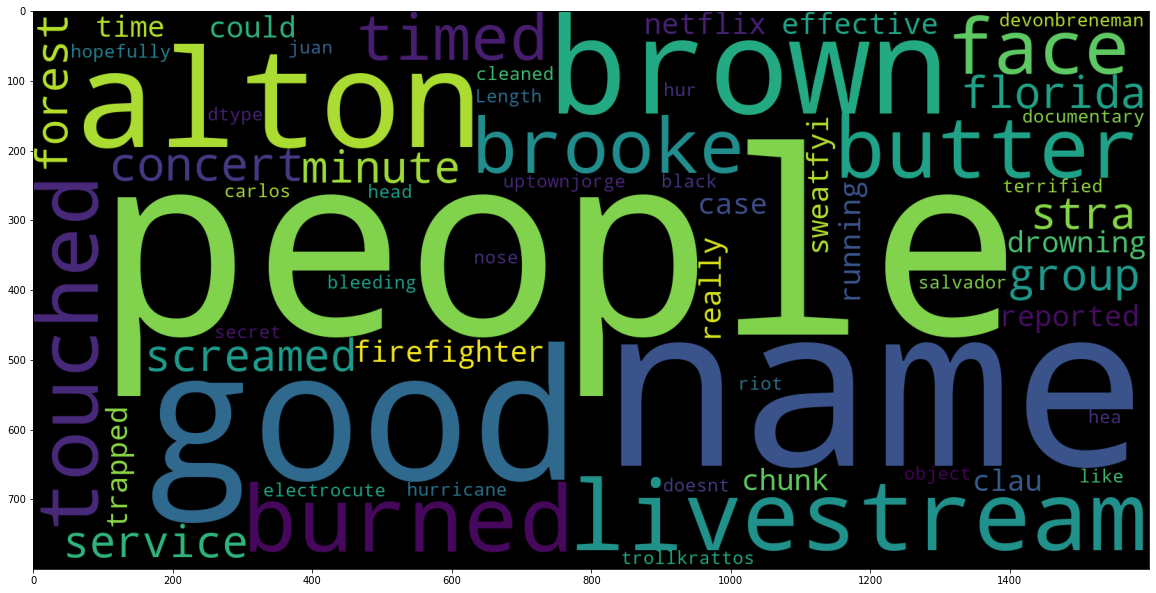

In [95]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(str(data[data['Encoding']==1].cleaned))
plt.imshow(wc)

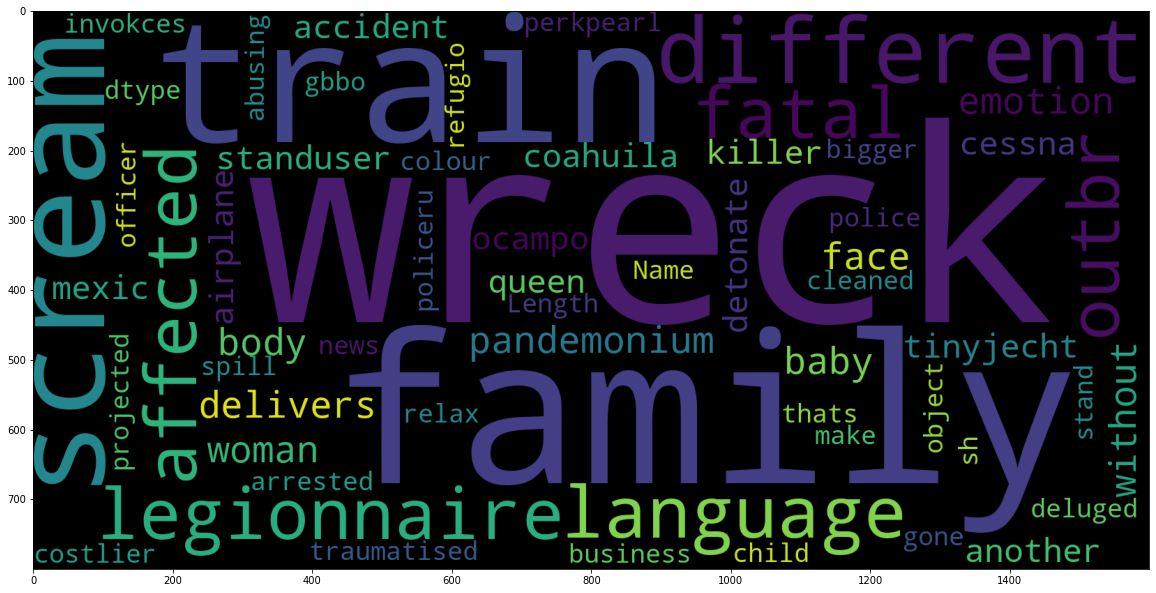

In [96]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(str(data[data['Encoding']==0].cleaned))
plt.imshow(wc)

In [97]:
train, validate, test = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])

In [98]:
X_Train_new = train[['Encoding', 'cleaned']]
X_Train_new

,Encoding,cleaned
1119,1,merely technical logistical feat russian mark ...
1817,1,smart sweet playful romantic comedy
379,1,last time high profile name signing nffc city ...
703,0,clev clev indeed know happened clev drowned cl...
1687,0,michaelgbaron come scott rice doesnt another s...
...,...,...
787,1,light cute forgettable
1662,0,bluejays brave angel instead dumping water ple...
166,1,landolina make stop bleeding instantly
364,0,japan mark anniversary hiroshima atomic bombing


In [99]:
X_Test_new = test[['Encoding', 'cleaned']]
X_Test_new

,Encoding,cleaned
516,0,brother cause thunder lmao
183,0,governor allows parole school hijacker
1257,0,internally externally screaming
1518,0,police link tunisian beach massacre bardo muse...
191,1,back home cause chill white
...,...,...
1726,1,value held enterprise crew together previous a...
504,0,california bush fire please evacuate affected ...
1699,1,laois girl advertised friend replace lovedup i...
959,0,swiss kosher hotel bridge collapse injures fiv...


In [100]:
X_Validate_new = validate[['Encoding', 'cleaned']]
X_Validate_new

,Encoding,cleaned
796,0,adamrubinespn familia injury head case
357,0,utterly compelling wrote reputation famous aut...
1251,0,horiikawa played online last night obliterated
444,1,sassy city girl country hunk stranded smoky mo...
1705,0,fatality motorcyclist blood everywhere sick
...,...,...
525,0,sorrower fresh wound scar death metal
1310,0,take away preservation park imposition danger ...
242,0,emergency dispatcher boone county seat
440,0,landslide italian kill three rome reuters thre...


## Sentiment Analysis using TF and KERAS

---



In [101]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"

In [102]:
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable = True)

In [103]:
X_train = X_Train_new['cleaned'].astype('string')
X_train = tf.constant(X_train)
X_train

<tf.Tensor: shape=(1118,), dtype=string, numpy=
array([b'merely technical logistical feat russian mark cinematic milestone',
       b'smart sweet playful romantic comedy',
       b'last time high profile name signing nffc city rioting wesley verhoek household name dontpanic',
       ..., b'landolina make stop bleeding instantly',
       b'japan mark anniversary hiroshima atomic bombing',
       b'spoofing easy target giant creature feature acknowledges celebrates cheesiness reason people kick watching today'],
      dtype=object)>

In [104]:
hub_layer(X_train[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 0.97626376, -0.4562835 ,  2.0974526 , -1.2056526 , -0.39009064,
         0.1528764 , -0.13761863, -1.0085151 , -0.36799267, -2.0260334 ,
         0.19164191,  0.05447635, -0.6477431 ,  0.21882458, -0.8917061 ,
         0.34042284,  1.4589854 , -1.0734786 , -1.1650401 , -0.20311676],
       [ 2.5404985 , -0.4746505 ,  0.96505535, -0.95622164, -2.6504054 ,
         1.6158155 , -0.71375567,  0.74328715,  2.172536  , -1.6548378 ,
        -1.7444326 ,  0.95028377, -1.2687472 ,  0.06129894, -1.9216708 ,
        -1.4822335 ,  0.01049031,  0.9433211 , -1.6365726 , -1.188248  ],
       [-0.29165417, -0.8645472 , -0.0835253 , -0.33143783, -0.1376513 ,
        -0.5020988 ,  0.14731105, -0.37841702,  0.19176659, -0.75653183,
        -0.72333837,  0.46250212, -0.8970671 , -0.27411604,  0.49830395,
         0.37692255,  1.2219373 , -1.3469574 , -0.46970892,  0.02017028]],
      dtype=float32)>

In [105]:
y_train = tf.constant(X_Train_new['Encoding'])
y_train

<tf.Tensor: shape=(1118,), dtype=int64, numpy=array([1, 1, 1, ..., 1, 0, 1])>

In [106]:
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
#train_data = X_train, y_train

In [107]:
train_data

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int64)>

In [108]:
X_Validate = X_Validate_new['cleaned'].astype('string')
X_Validate = tf.constant(X_Validate)
X_Validate

<tf.Tensor: shape=(373,), dtype=string, numpy=
array([b'adamrubinespn familia injury head case',
       b'utterly compelling wrote reputation famous author ever lived come question',
       b'horiikawa played online last night obliterated',
       b'sassy city girl country hunk stranded smoky mountain snowstorm aoms',
       b'fatality motorcyclist blood everywhere sick',
       b'city calgary activates municipal emergency plan',
       b'adanne kindly follow back',
       b'though film clumsy ambition equally admirably uncommercial',
       b'traumatised megancoopy', b'might esoteric weapon astrologian',
       b'ember aware',
       b'digitalvideo documentary standup comedian great glimpse different world',
       b'masterful film master filmmaker unique deceptive grimness compelling fatalist worldview',
       b'issue hazardous weather outlook',
       b'fedex longer ship potential bioterror pathogen fedex corp nyse longer deliver package',
       b'forgive testy deluged hatred lost

In [109]:
y_validate = tf.constant(tf.constant(X_Validate_new['Encoding']))
y_validate

<tf.Tensor: shape=(373,), dtype=int64, numpy=
array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
     

In [110]:
validation_data = tf.data.Dataset.from_tensor_slices((X_Validate, y_validate))
#validation_data = X_Validate, y_validate
validation_data

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int64)>

## Building a Model in Keras

In [111]:
model = keras.Sequential()
model.add(hub_layer)
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [112]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 20)                400020    
                                                                 
 dense_4 (Dense)             (None, 16)                336       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [113]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [114]:
history = model.fit(train_data.shuffle(1118).batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 1s 102ms/step - loss: 0.7018 - accuracy: 0.5179 - val_loss: 0.6669 - val_accuracy: 0.5871
Epoch 2/20
3/3 [==============================] - 0s 23ms/step - loss: 0.6819 - accuracy: 0.5358 - val_loss: 0.6526 - val_accuracy: 0.6139
Epoch 3/20
3/3 [==============================] - 0s 24ms/step - loss: 0.6643 - accuracy: 0.5617 - val_loss: 0.6404 - val_accuracy: 0.6354
Epoch 4/20
3/3 [==============================] - 0s 22ms/step - loss: 0.6497 - accuracy: 0.5832 - val_loss: 0.6303 - val_accuracy: 0.6622
Epoch 5/20
3/3 [==============================] - 0s 21ms/step - loss: 0.6368 - accuracy: 0.6038 - val_loss: 0.6218 - val_accuracy: 0.6649
Epoch 6/20
3/3 [==============================] - 0s 21ms/step - loss: 0.6254 - accuracy: 0.6190 - val_loss: 0.6147 - val_accuracy: 0.6756
Epoch 7/20
3/3 [==============================] - 0s 24ms/step - loss: 0.6148 - accuracy: 0.6377 - val_loss: 0.6085 - val_accuracy: 0.6890
Epoch 8/20
3/3 [=====================

In [115]:
X_test = X_Test_new['cleaned'].astype('string')
X_test = tf.constant(X_test)
X_test

<tf.Tensor: shape=(373,), dtype=string, numpy=
array([b'brother cause thunder lmao',
       b'governor allows parole school hijacker',
       b'internally externally screaming',
       b'police link tunisian beach massacre bardo museum attack',
       b'back home cause chill white',
       b'jamienye cant blame coaching management penalty defence injury cursed probably good rider',
       b'also flew bomb site world warning letter telling people evacuate',
       b'lawsonofficial followed contain scream thankyou',
       b'tragedy live recount horror coach train plunging water called',
       b'refugio spill costlier bigger projected',
       b'nflexpertpicks michael floyds hand injury shouldnt devalue fantasy stock michael floyds damaged digit',
       b'louis vuitton monogram sophie limited edition clutch cross body full read ebay',
       b'catching gbbo girl cake totally collapsed feel',
       b'photo bath body work cosmetic periwinkle blue copper piping along four corner',
      

In [116]:
y_test = tf.constant(X_Test_new['Encoding'])
y_test

<tf.Tensor: shape=(373,), dtype=int64, numpy=
array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
     

In [117]:
test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_data

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int64)>

In [118]:
results = model.evaluate(test_data.batch(512), verbose=2)

1/1 - 0s - loss: 0.5575 - accuracy: 0.7158 - 20ms/epoch - 20ms/step


In [119]:
#(model.predict([input(str('Write a sentence: '))])>0.5).astype('int32')

In [124]:
X = model.predict([input(str('Write a sentence: '))])
#X = X.astype(float)
ans = ""
if X >= 0.5:
  print("array = 1 (Happy!), confidence: ", int(100 * (X)), "%")

elif X < 0.5:
  print("array = 0 (Sad!), confidence: ", int(100 * (1 - X)), "%")



Write a sentence: I'm having good time with my family
array = 1 (Happy!), confidence:  69 %
